In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [20]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Data Analysis\Python\movies.csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [21]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [24]:
#check for missing values
df.isnull().sum()



name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [26]:
# 1. Drop rows with missing score/votes (only 3 rows)
df_cleaned = df.dropna(subset=['score', 'votes']).copy()


In [28]:
# 2. Fill categorical missing values with 'Unknown'
categorical_cols = ['writer', 'star', 'country', 'company']
for col in categorical_cols:
    missing_count = df_cleaned[col].isna().sum()
    if missing_count > 0:
        df_cleaned[col] = df_cleaned[col].fillna('Unknown')

In [29]:
# 3. Impute runtime with median
runtime_missing = df_cleaned['runtime'].isna().sum()
if runtime_missing > 0:
    median_runtime = df_cleaned['runtime'].median()
    df_cleaned['runtime'] = df_cleaned['runtime'].fillna(median_runtime)

In [30]:
# 4. Keep budget, gross, rating, released as is
print(f"\n✓ Keeping budget ({df_cleaned['budget'].isna().sum()} missing) as is")
print(f"✓ Keeping gross ({df_cleaned['gross'].isna().sum()} missing) as is")
print(f"✓ Keeping rating ({df_cleaned['rating'].isna().sum()} missing) as is")
print(f"✓ Keeping released ({df_cleaned['released'].isna().sum()} missing) as is")



✓ Keeping budget (2171 missing) as is
✓ Keeping gross (186 missing) as is
✓ Keeping rating (75 missing) as is
✓ Keeping released (2 missing) as is


In [31]:
print("FINAL MISSING VALUES COUNT:")
print(df_cleaned.isnull().sum())

FINAL MISSING VALUES COUNT:
name           0
rating        75
genre          0
year           0
released       2
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2171
gross        186
company        0
runtime        0
dtype: int64


In [32]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [36]:
# Convert float columns to int (keeping NaN as NaN using Int64 nullable integer type)
df['votes'] = df['votes'].astype('Int64')
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')
df['runtime'] = df['runtime'].astype('Int64')


In [37]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         Int64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime       Int64
dtype: object


In [38]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [41]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,<NA>
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,<NA>,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120


<Axes: xlabel='gross', ylabel='budget'>

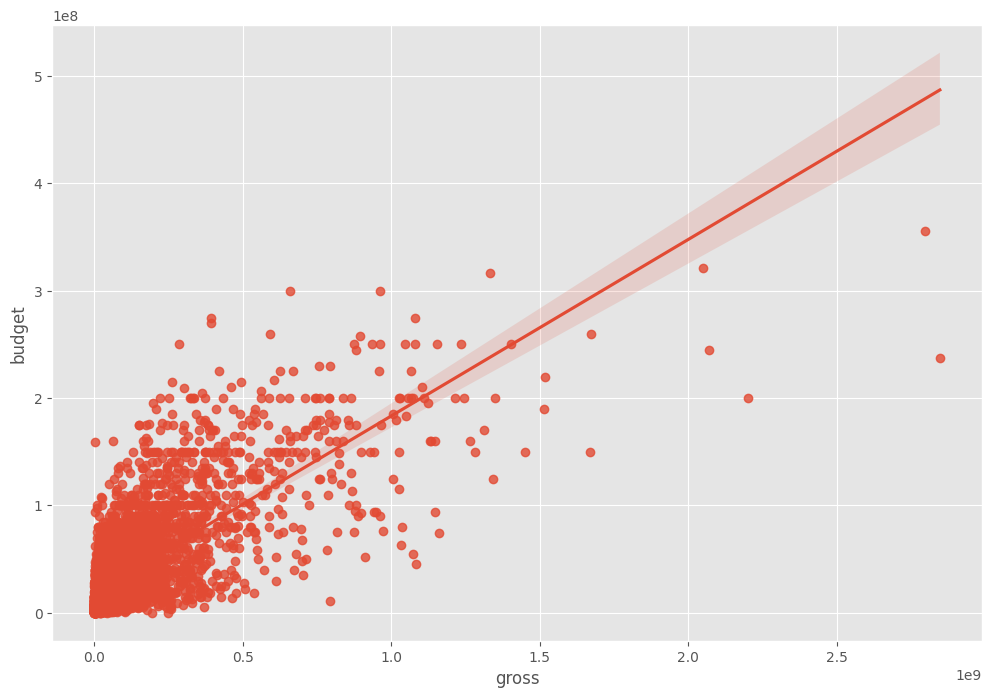

In [42]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

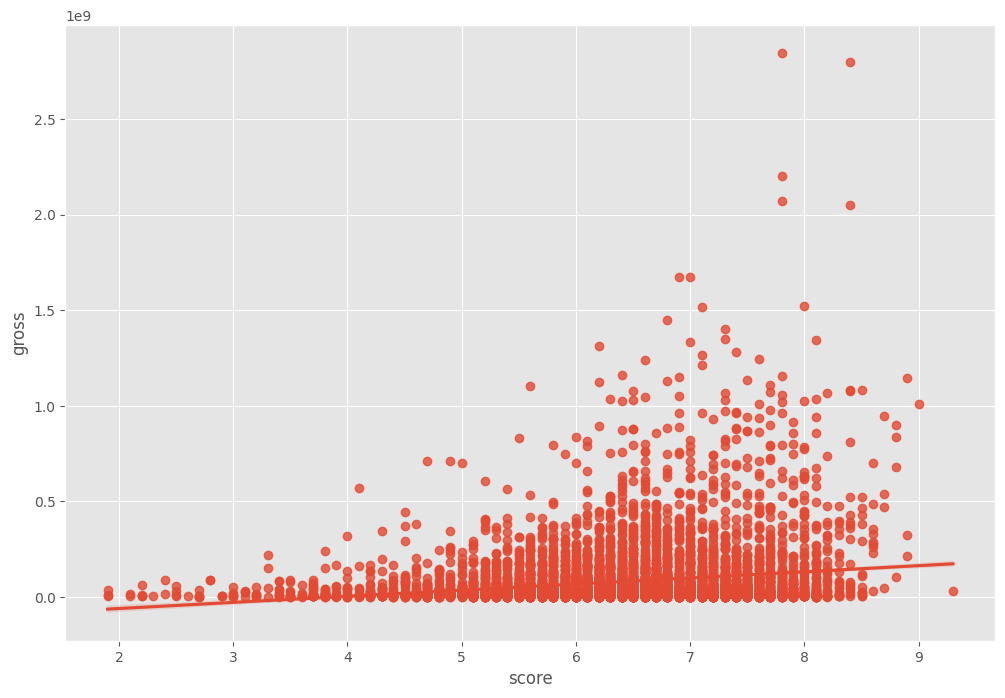

In [43]:
sns.regplot(x="score", y="gross", data=df)

In [46]:
df.select_dtypes(include='number').corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [47]:
df.select_dtypes(include='number').corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


In [48]:
df.select_dtypes(include='number').corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


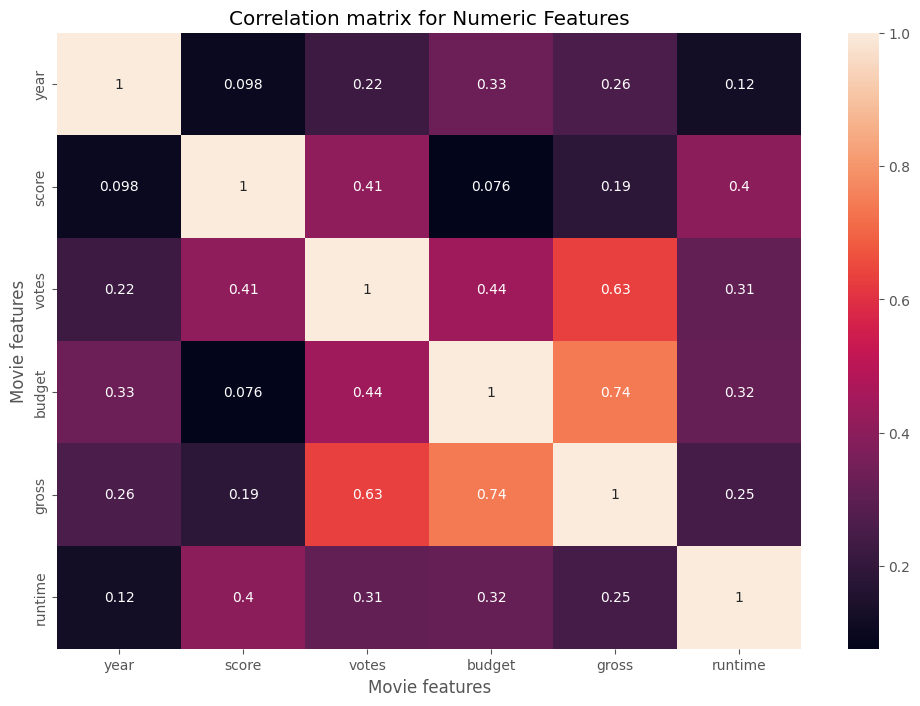

In [50]:
correlation_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [51]:
print("3. TOP 10 HIGHEST RATED MOVIES (with 10k+ votes)")
print("="*80)
top_rated = df[df['votes'] > 10000].nlargest(10, 'score')[['name', 'score', 'votes', 'director', 'genre']]
print(top_rated.to_string(index=False))


3. TOP 10 HIGHEST RATED MOVIES (with 10k+ votes)
                                             name  score   votes          director     genre
                         The Shawshank Redemption    9.3 2400000    Frank Darabont     Drama
                                  The Dark Knight    9.0 2400000 Christopher Nolan    Action
                                 Schindler's List    8.9 1200000  Steven Spielberg Biography
                                     Pulp Fiction    8.9 1900000 Quentin Tarantino     Crime
    The Lord of the Rings: The Return of the King    8.9 1700000     Peter Jackson    Action
                                     Forrest Gump    8.8 1900000   Robert Zemeckis     Drama
                                       Fight Club    8.8 1900000     David Fincher     Drama
The Lord of the Rings: The Fellowship of the Ring    8.8 1700000     Peter Jackson    Action
                                        Inception    8.8 2100000 Christopher Nolan    Action
   Star Wars: Episode

In [54]:

print("4. TOP 10 HIGHEST GROSSING MOVIES")
print("="*80)
top_grossing = df.nlargest(10, 'gross')[['name', 'gross', 'budget',  'director']]
top_grossing['gross_millions'] = (top_grossing['gross'] / 1_000_000).round(2)
top_grossing['budget_millions'] = (top_grossing['budget'] / 1_000_000).round(2)
print(top_grossing[['name', 'gross_millions', 'budget_millions', 'director']].to_string(index=False))


4. TOP 10 HIGHEST GROSSING MOVIES
                                      name  gross_millions  budget_millions        director
                                    Avatar         2847.25            237.0   James Cameron
                         Avengers: Endgame          2797.5            356.0   Anthony Russo
                                   Titanic         2201.65            200.0   James Cameron
Star Wars: Episode VII - The Force Awakens         2069.52            245.0     J.J. Abrams
                    Avengers: Infinity War         2048.36            321.0   Anthony Russo
                             The Lion King         1670.73            260.0     Jon Favreau
                            Jurassic World         1670.52            150.0 Colin Trevorrow
                              The Avengers         1518.82            220.0     Joss Whedon
                                 Furious 7         1515.34            190.0       James Wan
                                 Frozen II    

In [55]:
print("6. ANALYSIS BY GENRE")
print("="*80)
genre_stats = df.groupby('genre').agg({
    'name': 'count',
    'score': 'mean',
    'gross': 'mean',
    'budget': 'mean'
}).round(2)
genre_stats.columns = ['Count', 'Avg_Score', 'Avg_Gross', 'Avg_Budget']
genre_stats = genre_stats.sort_values('Count', ascending=False)
print(genre_stats)

6. ANALYSIS BY GENRE
           Count  Avg_Score     Avg_Gross   Avg_Budget
genre                                                 
Comedy      2245       6.19    44331874.3  22607802.13
Action      1705       6.20  145508580.85  58084599.21
Drama       1518       6.69   38930959.49  22914608.79
Crime        551       6.67   39401196.17  22363565.63
Biography    443       7.03   47874322.87  25312316.72
Adventure    427       6.29  109325230.22  45708389.06
Animation    338       6.77  239229987.45  75785197.13
Horror       322       5.75   47372409.13  12825159.09
Fantasy       44       6.01   38709328.72  16885714.29
Mystery       20       6.67   101183527.7  31876470.65
Thriller      16       5.91   26935259.42  10511111.11
Family        11       6.36  196172492.45   51125000.0
Sci-Fi        10       6.21   32561233.25   19733750.0
Romance       10       6.41   23549374.88   24040000.0
Western        3       5.67   10675295.33   10500000.0
Musical        2       8.05     2595346.0   

In [56]:
print("7. ANALYSIS BY RATING")
print("="*80)
rating_stats = df.groupby('rating').agg({
    'name': 'count',
    'score': 'mean',
    'gross': 'mean'
}).round(2)
rating_stats.columns = ['Count', 'Avg_Score', 'Avg_Gross']
rating_stats = rating_stats.sort_values('Count', ascending=False)
print(rating_stats)

7. ANALYSIS BY RATING
           Count  Avg_Score     Avg_Gross
rating                                   
R           3697       6.45   42668819.72
PG-13       2112       6.29  130877145.47
PG          1252       6.22  106441540.23
Not Rated    283       6.92   17795901.28
G            153       6.59  142043334.75
Unrated       52       6.62    1605119.23
NC-17         23       6.55   10763242.83
TV-MA          9       7.02   79170782.33
TV-PG          5       6.94  150353102.25
X              3       6.90    8485984.33
Approved       1       3.40    36565280.0
TV-14          1       6.30     5756185.0


In [58]:
print("8. ANALYSIS BY COUNTRY")
print("="*80)
country_stats = df.groupby('country').agg({
    'name': 'count',
    'score': 'mean'
}).round(2)
country_stats.columns = ['Count', 'Avg_Score']
country_stats = country_stats.sort_values('Count', ascending=False)
print(country_stats)


8. ANALYSIS BY COUNTRY
                                Count  Avg_Score
country                                         
United States                    5475       6.26
United Kingdom                    816       6.64
France                            279       6.74
Canada                            190       6.13
Germany                           117       6.44
Australia                          92       6.68
Japan                              81       7.22
India                              62       7.24
Italy                              61       6.70
Spain                              47       7.09
Hong Kong                          45       6.71
Ireland                            43       6.93
China                              40       6.70
South Korea                        35       7.16
Denmark                            32       7.10
New Zealand                        25       7.42
Sweden                             25       7.33
Mexico                             22       6.

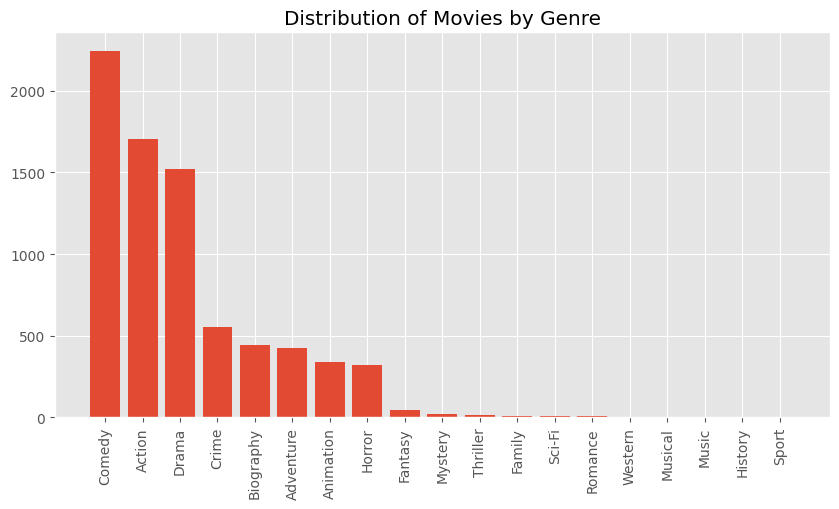

In [65]:
plt.figure(figsize=(10, 5))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Distribution of Movies by Genre')
plt.xticks(rotation=90)
plt.show()



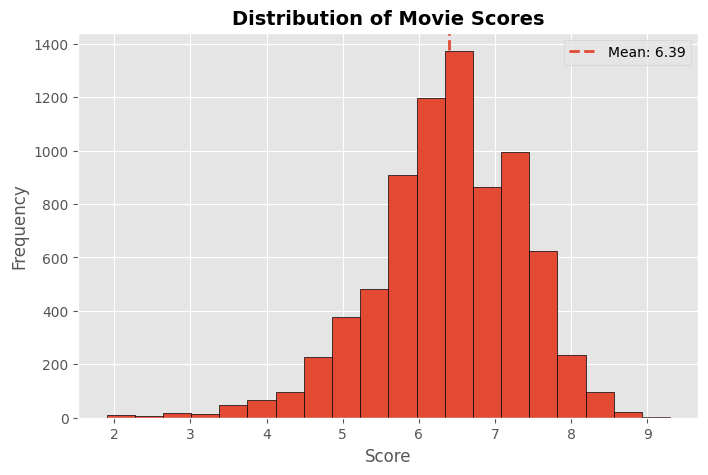

In [74]:
import matplotlib.pyplot as plt

scores = df['score'].dropna()
mean_score = scores.mean()

plt.figure(figsize=(8, 5))
plt.hist(scores, bins=20, edgecolor='black')
plt.axvline(mean_score, linestyle='--', linewidth=2, label=f'Mean: {mean_score:.2f}')

plt.title('Distribution of Movie Scores', fontsize=14, fontweight='bold')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()




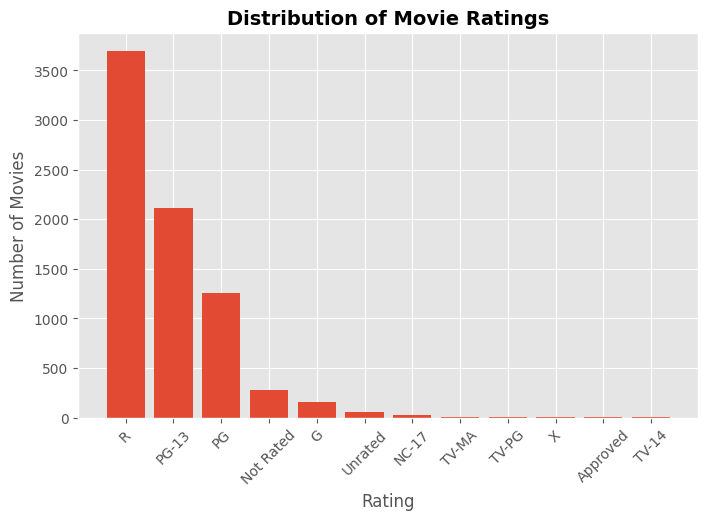

In [75]:
import matplotlib.pyplot as plt

rating_counts = df['rating'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values)

plt.title('Distribution of Movie Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

plt.show()
